In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.pyplot import *

In [5]:
df = pd.read_csv('/Users/ekanshtrivedi/Downloads/Zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
def count_plot(x, title, n):
    dims = (10, 8)
    fig, ax = plt.subplots(figsize=dims)
    group_count = n
    sns.set_palette('pastel')
    sns.countplot(x = x, order=x.value_counts().iloc[:group_count].index)
    plt.title(title)
    plt.show()


In [7]:
# Checking the number of values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
#Checking the number of null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### Lets go through the features that we have

#### 1. URL

In [9]:
#basically the zomato url for the restaurant, not of use for the model or analysis can be dropped
df.url.head()
del df['url']

#### 2. Address

In [10]:
df.address.head()

0    942, 21st Main Road, 2nd Stage, Banashankari, ...
1    2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...
2    1112, Next to KIMS Medical College, 17th Cross...
3    1st Floor, Annakuteera, 3rd Stage, Banashankar...
4    10, 3rd Floor, Lakshmi Associates, Gandhi Baza...
Name: address, dtype: object

In [11]:
# as we can see most of the values have last 2 terms as 'locality, Banaglore', we can maybe use geoencoding here. (first we will have to remove delivery only for this)
df.address.value_counts()
#we have 128 delivery only, lets check the location for them 

Delivery Only                                                                               128
14th Main, 4th Sector, HSR, Bangalore                                                        71
The Ritz-Carlton, 99, Residency Road, Bangalore                                              61
Citrus Hotels, 34, Cunningham Road, Bangalore                                                53
Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore                                         49
                                                                                           ... 
9/53, Near Kanti Sweets, 5th Main Road, Ganganagar, RT Nagar, Bangalore                       1
94 Neeladri Nagar, 14th Cross Neeladri Main Road, Doddatogur, Electronic City, Bangalore      1
12, Rahmathnagar Bus Stop, RT Nagar, Bangalore                                                1
SJR Equinox, Opposite Velankani Gate 3, Phase1, Electronic City, Bangalore                    1
B K Rama Reddy, Virat Nagar Circle, Bomm

In [12]:
df.address.str.strip()

0        942, 21st Main Road, 2nd Stage, Banashankari, ...
1        2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...
2        1112, Next to KIMS Medical College, 17th Cross...
3        1st Floor, Annakuteera, 3rd Stage, Banashankar...
4        10, 3rd Floor, Lakshmi Associates, Gandhi Baza...
                               ...                        
51712    Four Points by Sheraton Bengaluru, 43/3, White...
51713    Number 10, Garudachar Palya, Mahadevapura, Whi...
51714    Sheraton Grand Bengaluru Whitefield Hotel & Co...
51715    Sheraton Grand Bengaluru Whitefield Hotel & Co...
51716    ITPL Main Road, KIADB Export Promotion Industr...
Name: address, Length: 51717, dtype: object

In [13]:
#on the basis of this information we can create a new column where we will know if a restaurant is a cloud kitchen or not, ie delivery only
df['delivery_kitchen'] = ''

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    # Check if the address is 'delivery only'
    if row['address'] == 'Delivery Only':
        # If the address is 'delivery only', set the value of 'delivery kitchen' to 'yes'
        df.at[index, 'delivery_kitchen'] = 'yes'
    else:
        # If the address is not 'delivery only', set the value of 'delivery kitchen' to 'no'
        df.at[index, 'delivery_kitchen'] = 'no'

In [14]:
df.delivery_kitchen.value_counts()

no     51589
yes      128
Name: delivery_kitchen, dtype: int64

In [15]:
'''
#tried creating new location with address information, did not prove to be useful
for index, rows in dataset.iterrows():
    loc = rows['address']
    new_loca = loc.split()
    #print(loc)
    try:
        if len(new_loca) >= 2:
            new_location = new_loca[-2].strip(',')
            dataset.at[index, 'new_location1'] = new_location
        else:
             new_location = new_loca[-2].strip(',')
             dataset.at[index, 'new_location1'] = new_location
    
    except IndexError:
            print(f"IndexError: row {index} has an error")

'''            

'\n#tried creating new location with address information, did not prove to be useful\nfor index, rows in dataset.iterrows():\n    loc = rows[\'address\']\n    new_loca = loc.split()\n    #print(loc)\n    try:\n        if len(new_loca) >= 2:\n            new_location = new_loca[-2].strip(\',\')\n            dataset.at[index, \'new_location1\'] = new_location\n        else:\n             new_location = new_loca[-2].strip(\',\')\n             dataset.at[index, \'new_location1\'] = new_location\n    \n    except IndexError:\n            print(f"IndexError: row {index} has an error")\n\n'

In [16]:
'''
#tried to work a solution for the addresses that were not in the dataset, but it did not workout (same as above)
for index, rows in df.iterrows():
    loc = rows['address']
    new_loca = loc.split()
    #print(loc)
    try:
        if len(new_loca) >= 2:
            new_location = new_loca[-2].strip(',')
            df.at[index, 'new_location'] = new_location
        else:
             new_location = new_loca[0].strip(',')
             df.at[index, 'new_location'] = new_location
    
    except IndexError:
            print(f"IndexError: row {index} has an error")

'''            


'\n#tried to work a solution for the addresses that were not in the dataset, but it did not workout (same as above)\nfor index, rows in df.iterrows():\n    loc = rows[\'address\']\n    new_loca = loc.split()\n    #print(loc)\n    try:\n        if len(new_loca) >= 2:\n            new_location = new_loca[-2].strip(\',\')\n            df.at[index, \'new_location\'] = new_location\n        else:\n             new_location = new_loca[0].strip(\',\')\n             df.at[index, \'new_location\'] = new_location\n    \n    except IndexError:\n            print(f"IndexError: row {index} has an error")\n\n'

#### 3. Location

In [17]:
#dropping the values with no location as they are low in number
df = df.dropna( subset= ['location'], how = 'any')

In [18]:
'''
#creating new features with the help of the location feature
df['latitude'] = None
df['longitude'] = None
df['zipcode'] = None

# Use tqdm to track progress
for i, location in tqdm(enumerate(df['location']), total=len(df)):
    try:
        # Get location information
        loc = geolocator.geocode(location)
        
        # Extract latitude, longitude, and zipcode
        if loc is not None:
            latitude = loc.latitude
            longitude = loc.longitude
            zipcode = loc.raw['display_name'].split()[-2].strip(',')
            
            # Update DataFrame
            df.at[i, 'latitude'] = latitude
            df.at[i, 'longitude'] = longitude
            df.at[i, 'zipcode'] = zipcode
            
    except IndexError:
        print(f"IndexError: row {i} has an error")
'''        

'\n#creating new features with the help of the location feature\ndf[\'latitude\'] = None\ndf[\'longitude\'] = None\ndf[\'zipcode\'] = None\n\n# Use tqdm to track progress\nfor i, location in tqdm(enumerate(df[\'location\']), total=len(df)):\n    try:\n        # Get location information\n        loc = geolocator.geocode(location)\n        \n        # Extract latitude, longitude, and zipcode\n        if loc is not None:\n            latitude = loc.latitude\n            longitude = loc.longitude\n            zipcode = loc.raw[\'display_name\'].split()[-2].strip(\',\')\n            \n            # Update DataFrame\n            df.at[i, \'latitude\'] = latitude\n            df.at[i, \'longitude\'] = longitude\n            df.at[i, \'zipcode\'] = zipcode\n            \n    except IndexError:\n        print(f"IndexError: row {i} has an error")\n'

In [19]:
#as it istaking a lot of time to compute we are working wiith the top 1000 features for now
df_new = df.head(1000)

In [20]:
df_new.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),delivery_kitchen
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,no
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,no
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,no
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,no
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,no


In [21]:
#using geopy to get the zipcode and lat + long information of the data at hand
from geopy.geocoders import Nominatim
#from geopy import cache
#geolocator = Nominatim(user_agent="ny_explorer")
geolocator = Nominatim(user_agent="ny_explorer", timeout=10)
#nom=Nominatim(domain='localhost:8080', scheme='http')

In [22]:
#df_new = df.head(1000)

In [23]:
#creating longitude, latitude and zipcode for better analysis
df_new['latitude'] = None
df_new['longitude'] = None
df_new['zipcode'] = None

# Use tqdm to track progress
for i, location in tqdm(enumerate(df_new['location']), total=len(df_new)):
    try:
        # Get location information
        #geolocator = Nominatim(user_agent="ny_explorer")
        #cache = cache.SimpleCache(timeout=3600)
        add = location + ', Bengaluru, India'
        #print(add)
        loc = geolocator.geocode(add)
        #loc = nom.geocode(add)
        #print(loc)
        # Extract latitude, longitude, and zipcode
        if loc is not None:
            latitude = loc.latitude
            longitude = loc.longitude
            zipcode = loc.raw['display_name'].split()[-2].strip(',')
            
            # Update DataFrame
            df_new.at[i, 'latitude'] = latitude
            df_new.at[i, 'longitude'] = longitude
            df_new.at[i, 'zipcode'] = zipcode
            
    except IndexError:
        print(f"IndexError: row {i} has an error")

/var/folders/c5/tjv7st2x72ngbtdlgbyt2ms80000gn/T/ipykernel_72814/3527251417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['latitude'] = None
/var/folders/c5/tjv7st2x72ngbtdlgbyt2ms80000gn/T/ipykernel_72814/3527251417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['longitude'] = None
/var/folders/c5/tjv7st2x72ngbtdlgbyt2ms80000gn/T/ipykernel_72814/3527251417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

KeyboardInterrupt: 

In [ ]:
df_new.to_csv('top_1000_zomato.csv', index=False)

In [24]:
df_new = pd.read_csv('/Users/ekanshtrivedi/Downloads/top_1000_zomato.csv')

In [25]:
df_new1 = df_new
df_new1.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),delivery_kitchen,latitude,longitude,zipcode
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,no,12.941726,77.575502,560004


In [26]:
df_new.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),delivery_kitchen,latitude,longitude,zipcode
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,no,12.941726,77.575502,560004


#### 4. Name

In [27]:
#we can see that many restaurants have mutilple franchises around bangalore
df.name.value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Bridgeway                                                   1
The US Burger                                               1
Ayesha Hotel                                                1
Chandra Prakesh Veg Restaurant                              1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8788, dtype: int64

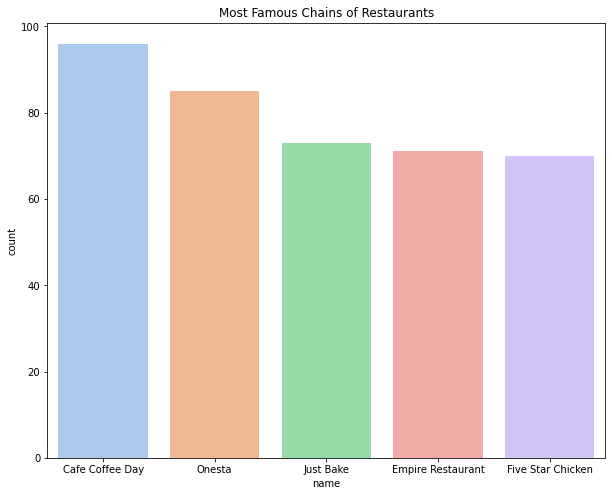

In [28]:
#with this feature we can possibly see the number of restaurants and how they are prices in each locality or how successful they are in each locality.
count_plot(df.name, 'Most Famous Chains of Restaurants', 5)


In [29]:
df_new.name.isnull().sum()

0

#### 4. Online_Order 

In [30]:
df.online_order.value_counts()

Yes    30444
No     21252
Name: online_order, dtype: int64

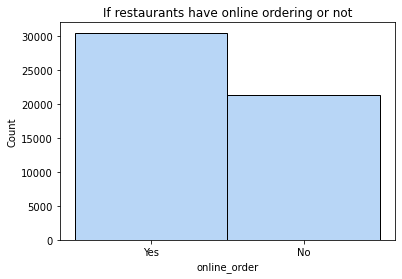

In [31]:
#Many restaurants have the option to allow for online orders where as many stil don't
sns.histplot(df.online_order)
sns.set_palette('pastel')
plt.title("If restaurants have online ordering or not")
plt.show()

In [32]:
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df_new['online_order'] = df_new['online_order'].map({'Yes': 1, 'No': 0})

In [33]:
df_new.online_order.value_counts()

1    651
0    349
Name: online_order, dtype: int64

In [34]:
df_new.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),delivery_kitchen,latitude,longitude,zipcode
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,no,12.941726,77.575502,560004


#### 5. Book_table

In [35]:
df.book_table.isnull().sum()

0

In [36]:
df.book_table.value_counts()

No     45247
Yes     6449
Name: book_table, dtype: int64

In [37]:
rows_yes = df[df.book_table == 'Yes' ]
values_yes = rows_yes['approx_cost(for two people)']

In [38]:
values_yes.value_counts()

1,000    758
800      693
1,200    673
1,500    658
1,300    404
1,400    365
1,100    337
600      297
900      271
700      241
1,600    228
1,700    193
2,000    186
1,800    147
2,500    116
3,000    114
750      104
650       73
500       65
2,100     61
850       58
1,900     56
2,200     52
2,800     45
300       37
400       27
3,500     25
4,000     24
450       23
2,400     22
1,350     18
950       15
3,400     13
2,600     10
550        7
350        6
1,650      6
200        5
4,100      4
2,700      3
3,200      2
6,000      2
1,250      2
2,300      1
5,000      1
3,700      1
Name: approx_cost(for two people), dtype: int64

In [39]:
rows_no = df[df.book_table == 'No' ]
values_no = rows_no['approx_cost(for two people)']

In [40]:
values_no.value_counts()

300      7539
400      6535
500      4915
200      4852
600      3417
250      2959
150      2066
350      1757
700      1707
800      1592
450      1394
100       993
1,000     879
550       754
650       703
750       654
900       429
1,200     320
1,500     313
2,000     177
1,100     175
1,300     112
850       108
1,400     108
1,800      56
1,700      54
3,000      48
950        47
1,600      38
2,500      30
2,200      26
120        24
180        20
1,900      14
230        10
2,300      10
80         10
50          8
130         8
40          8
1,250       7
2,100       6
1,450       5
4,000       5
199         4
330         4
1,050       4
70          3
360         2
140         2
4,500       2
190         2
240         2
560         1
60          1
469         1
160         1
2,400       1
Name: approx_cost(for two people), dtype: int64

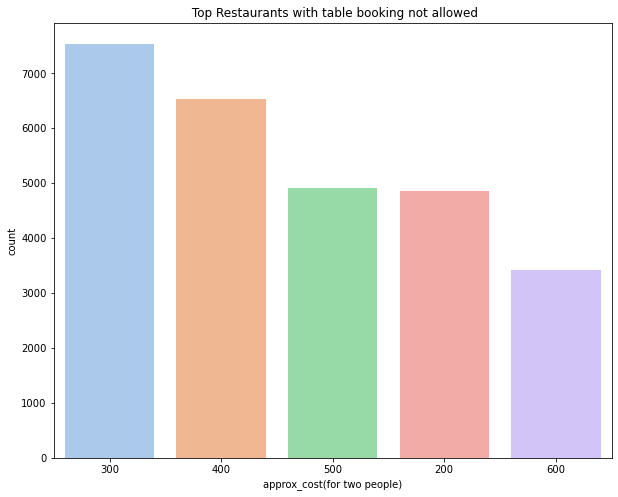

In [41]:
count_plot(values_no, " Top Restaurants with table booking not allowed", 5)

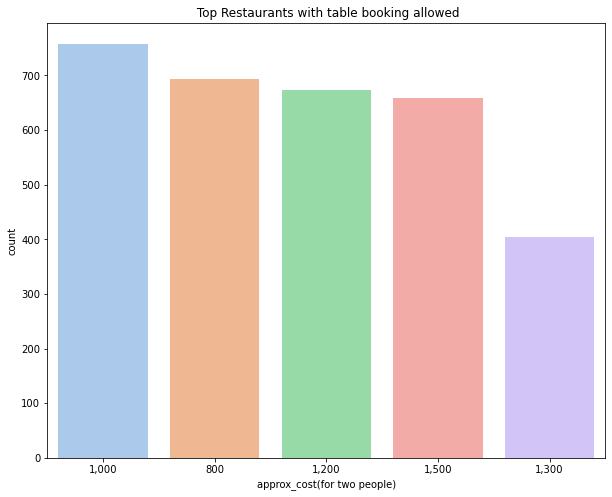

In [42]:
count_plot(values_yes, " Top Restaurants with table booking allowed", 5)

Thus, we can conclude that if table booking is allowed then the restaurant charges more, compared to the ones with no table booking.


#### 6. Rate 

In [43]:
df.rate.isnull().sum()

7754

In [44]:
rows_null = df[df.rate.isnull()]

In [45]:
rows_null['votes'].value_counts()

0       7710
4          7
5          3
6          3
16         2
265        1
1168       1
149        1
465        1
1037       1
1313       1
1240       1
155        1
350        1
299        1
10         1
132        1
1221       1
2508       1
2464       1
2497       1
475        1
339        1
167        1
80         1
143        1
283        1
122        1
131        1
285        1
326        1
1137       1
1251       1
257        1
Name: votes, dtype: int64

when rates value is null, even the value for votes in most cases is 0, high possibility that most restaurants have not been voted that do not have rates.

In [46]:
df = df.dropna(subset = 'rate', how = 'any')
df_new = df_new.dropna(subset = 'rate', how = 'any')

In [47]:
#need to clean the value rate
df.rate.head()

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
Name: rate, dtype: object

In [48]:
type(df.rate)

pandas.core.series.Series

In [49]:
df.rate = df.rate.str.strip('/5')
df_new.rate = df_new.rate.str.strip('/5')

/var/folders/c5/tjv7st2x72ngbtdlgbyt2ms80000gn/T/ipykernel_72814/1230044296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rate = df_new.rate.str.strip('/5')


In [50]:
#df.rate = df.rate.replace('NEW', 0)
df_new.rate = df_new.rate.replace('NEW', 0)

/var/folders/c5/tjv7st2x72ngbtdlgbyt2ms80000gn/T/ipykernel_72814/4129999221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rate = df_new.rate.replace('NEW', 0)


In [51]:
df_new.rate.value_counts()

3.8     122
3.9      95
3.7      93
3.6      88
4.1      61
4.0      58
3.       51
3.4      47
0        47
3.3      44
4.2      38
3.2      35
3.1      27
3.0      23
4.3      13
2.9      12
2.7      10
4.4       9
2.8       8
2.6       6
4.6       4
4.        3
2.        3
4.7       2
3.8       1
Name: rate, dtype: int64

In [52]:
df_geo_analysis = df_new.loc[:,['name','rate','location','rest_type','dish_liked','cuisines','approx_cost(for two people)','latitude', 'longitude','delivery_kitchen']]

In [53]:
df_geo_analysis.head()

,name,rate,location,rest_type,dish_liked,cuisines,approx_cost(for two people),latitude,longitude,delivery_kitchen
0,Jalsa,4.1,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,12.965283,77.594452,no
1,Spice Elephant,4.1,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,12.965283,77.594452,no
2,San Churro Cafe,3.8,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,12.965283,77.594452,no
3,Addhuri Udupi Bhojana,3.7,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,12.965283,77.594452,no
4,Grand Village,3.8,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,12.941726,77.575502,no


In [54]:
df_geo_analysis['rate'] = np.where(df_geo_analysis['rate'] != 0,df_geo_analysis['rate'], np.nan)

In [55]:
df_geo_analysis = df_geo_analysis.dropna(subset ='rate', how = 'any')

In [56]:
df_geo_analysis.isnull().sum()

name                             0
rate                             0
location                         0
rest_type                        1
dish_liked                     400
cuisines                         1
approx_cost(for two people)      0
latitude                         0
longitude                        0
delivery_kitchen                 0
dtype: int64

In [57]:
df_geo_analysis['rate'] = pd.to_numeric(df_geo_analysis['rate'], downcast="float")

In [58]:
avg_ratings = df_geo_analysis.groupby(['latitude', 'longitude', 'location'])['rate'].mean().reset_index()

In [59]:
avg_ratings

,latitude,longitude,location,rate
0,12.850318,77.588326,Bannerghatta Road,3.693750
1,12.862468,77.560893,South Bangalore,3.266667
2,12.905568,77.545544,Uttarahalli,3.511111
3,12.907251,77.578271,JP Nagar,3.714583
4,12.908149,77.555318,Kumaraswamy Layout,3.441176
5,12.911276,77.604565,BTM,3.596429
6,12.927441,77.515522,Rajarajeshwari Nagar,3.850000
7,12.929273,77.582423,Jayanagar,3.801099
8,12.936642,77.575391,Kanakapura Road,3.400000
9,12.941726,77.575502,Basavanagudi,3.692500


In [60]:
import folium
#m = folium.Map(location=[avg_ratings['latitude'].iloc[0], avg_ratings['longitude'].iloc[0]], zoom_start=10)
m = folium.Map(location=[12.934533, 77.626579], zoom_start=11)
# add a marker for each location, with the size and color indicating the average rating
for i, row in avg_ratings.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['rate']*5,  # increase the size based on the rating value
        color='#3186cc',
        fill_color='#3186cc',
        fill_opacity=0.5,
        tooltip=f'Average rating: {row["rate"]:.2f}'
    ).add_to(m)

# display the map
m

In [61]:
rating_labels = ['Poor','Good', 'Very Good', 'Excellent']
avg_ratings['rating_cat'] = pd.cut(avg_ratings['rate'], bins=[0, 3, 3.2, 3.7, 5], labels=rating_labels)

# create a map centered on the first location
m = folium.Map(location=[avg_ratings['latitude'].iloc[0], avg_ratings['longitude'].iloc[0]], zoom_start=10)

# add a marker for each location, with the size and color indicating the average rating category
for i, row in avg_ratings.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color='#3186cc',
        fill_color=('#d53e4f' if row['rating_cat'] == 'Poor'
                    else '#fc8d59' if row['rating_cat'] == 'Fair'
                    else '#fee08b' if row['rating_cat'] == 'Good'
                    else '#e6f598' if row['rating_cat'] == 'Very Good'
                    else '#99d594'),
        fill_opacity=0.5,
        tooltip=f'{row["location"]}: {row["rate"]:.2f} ({row["rating_cat"]})'
    ).add_to(m)

# display the map
m

#### 7. Phone

In [62]:
#phone does not give us much information we will remove it
df.phone.head()

0      080 42297555\r\n+91 9743772233
1                        080 41714161
2                      +91 9663487993
3                      +91 9620009302
4    +91 8026612447\r\n+91 9901210005
Name: phone, dtype: object

In [63]:
df.phone.value_counts()

080 43334321                            181
080 43334333                            119
+91 7710055553                           58
080 33994444                             57
+91 7700020020                           54
                                       ... 
080 43025801\r\r\r\n+91 9148121314        1
080 40917163\r\n+91 9880896634            1
+91 8197022223\r\r\r\n+91 9032216666      1
+91 8553159399\r\r\r\n080 26840038        1
+91 8040991947                            1
Name: phone, Length: 12886, dtype: int64

In [64]:
del df['phone']
del df_new['phone']

In [65]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),delivery_kitchen
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,no
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,no
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,no
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,no
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,no


#### 8. rest_type

In [66]:
df.rest_type.isnull().sum()

151

In [67]:
df.rest_type.value_counts()

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

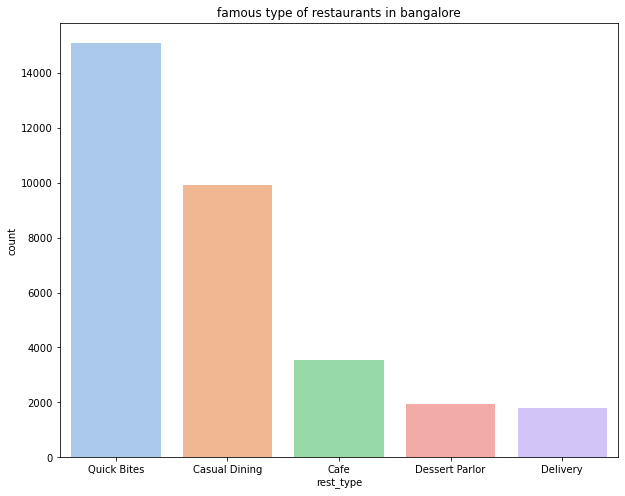

In [68]:
count_plot(df.rest_type, 'famous type of restaurants in bangalore', 5)

rest_type looks like an important feature for analysis, we should keep it and remove the null values as they are less in number

In [69]:
df = df.dropna(subset = 'rest_type', how = 'any')
df_new = df_new.dropna(subset = 'rest_type', how = 'any')

In [70]:
df_new.isnull().sum()

address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
dish_liked                     447
cuisines                         1
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
delivery_kitchen                 0
latitude                         0
longitude                        0
zipcode                          0
dtype: int64

In [71]:
import re
from collections import Counter
#we are trying to find the most common type of restaurant in bangalore (to be done with the complete dataset as well)
#df_new['rest_type'] = df_new['rest_type'].apply(lambda x: re.sub(r'[^\w\s,]','',x.lower()))

In [72]:
df_new['types'] = df_new['rest_type'].apply(lambda x: x.split(',') if ',' in x else [x.strip()])

In [73]:
#df_new['types_one'] = df_new['rest_type'].apply(lambda x: [types.strip() for types in x.split(',')])

In [74]:
#df_new['rest_type'] = df_new['rest_type'].str.split(',')

In [75]:
#del df_new['rest_type']

In [76]:
#df_new['rest_type'] = df['rest_type'].head(1000)

In [77]:
df_new.types.value_counts()

[Quick Bites]                       408
[Casual Dining]                     184
[Cafe]                               96
[Dessert Parlor]                     40
[Takeaway,  Delivery]                30
[Delivery]                           16
[Bakery]                             16
[Sweet Shop]                         13
[Beverage Shop]                      10
[Bar]                                10
[Beverage Shop,  Quick Bites]         7
[Casual Dining,  Cafe]                7
[Cafe,  Casual Dining]                7
[Pub]                                 6
[Casual Dining,  Bar]                 6
[Sweet Shop,  Quick Bites]            5
[Quick Bites,  Cafe]                  4
[Bakery,  Quick Bites]                3
[Food Truck]                          3
[Beverage Shop,  Dessert Parlor]      3
[Bar,  Casual Dining]                 2
[Quick Bites,  Bakery]                2
[Lounge]                              2
[Food Court]                          2
[Dessert Parlor,  Sweet Shop]         2


In [78]:
#flattening the list for visualization
all_types = [types for sublist in df_new['types'].tolist() for types in sublist]

In [79]:
all_types_stripped = [types.strip() for types in all_types]

In [80]:
print(all_types_stripped)

['Casual Dining', 'Casual Dining', 'Cafe', 'Casual Dining', 'Quick Bites', 'Casual Dining', 'Casual Dining', 'Casual Dining', 'Casual Dining', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Casual Dining', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Quick Bites', 'Cafe', 'Cafe', 'Cafe', 'Cafe', 'Quick Bites', 'Cafe', 'Cafe', 'Casual Dining', 'Cafe', 'Cafe', 'Quick Bites', 'Delivery', 'Delivery', 'Quick Bites', 'Delivery', 'Quick Bites', 'Casual Dining', 'Casual Dining', 'Quick Bites', 'Quick Bites', 'Mess', 'Quick Bites', 'Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Quick Bites', 'Casual Dining', 'Casual Dining', 'Quick Bites', 'Quick Bites', 'Quick Bites', 'Dessert Parlor', 'Casual Dining', 'Quick Bites', 'Delivery', 'Quick Bites', 'Casual Dining', 'Quick Bites', 'Dessert Parlor', 'Casual Dining', 'Casual Dining', 'Quick Bites', 'Casual Dining', 'Bakery', 'Dessert Parlor', 'Quick Bites', 'Quick Bites', 'Pub', 'Bakery', 'Quick Bites', 'Tak

In [81]:
type_counts = Counter(all_types_stripped)

In [82]:
len(type_counts)

18

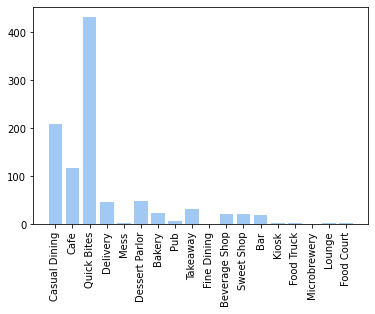

In [83]:
plt.bar(type_counts.keys(), type_counts.values())
plt.xticks(rotation=90)
plt.show()

In [84]:
df_new['rest_type1'] = df_new['rest_type'].str.split(',')

In [85]:
df_new['rest_type2'] = df_new['rest_type']

In [86]:
df_new['rest_type2']

0            Casual Dining
1            Casual Dining
2      Cafe, Casual Dining
3              Quick Bites
4            Casual Dining
              ...         
994          Casual Dining
995          Casual Dining
996          Casual Dining
997          Casual Dining
998            Quick Bites
Name: rest_type2, Length: 899, dtype: object

In [87]:
types = set()
def func(x):
    if(type(x) == list):
        print(x)
        for y in x:
            types.add(y.strip())
_ = df_new['rest_type2'].str.split(',').apply(func)

['Casual Dining']
['Casual Dining']
['Cafe', ' Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining', ' Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe', ' Casual Dining']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Quick Bites', ' Cafe']
['Cafe']
['Cafe']
['Cafe', ' Quick Bites']
['Cafe']
['Cafe']
['Casual Dining', ' Cafe']
['Cafe']
['Quick Bites']
['Delivery']
['Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Mess']
['Quick Bites']
['Quick Bites']
['Casual Dining', ' Cafe']
['Delivery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Bakery', ' Dessert Par

In [88]:
column_names = list(types)
# instantiate the dataframe
neighborhood = pd.DataFrame(columns=column_names)
neighborhood

,Lounge,Kiosk,Dessert Parlor,Casual Dining,Quick Bites,Food Truck,Fine Dining,Sweet Shop,Bar,Microbrewery,Bakery,Takeaway,Pub,Food Court,Beverage Shop,Mess,Cafe,Delivery


In [89]:
neighborhood['neighborhood'] = df_new.groupby('location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood

,Lounge,Kiosk,Dessert Parlor,Casual Dining,Quick Bites,Food Truck,Fine Dining,Sweet Shop,Bar,Microbrewery,Bakery,Takeaway,Pub,Food Court,Beverage Shop,Mess,Cafe,Delivery
neighborhood,,,,,,,,,,,,,,,,,,
BTM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Basavanagudi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
City Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
JP Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jayanagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kanakapura Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kumaraswamy Layout,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
df_new = df_new.dropna(subset = 'rest_type2', how = 'any')

In [91]:
df_new.isnull().sum()

address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
dish_liked                     447
cuisines                         1
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
delivery_kitchen                 0
latitude                         0
longitude                        0
zipcode                          0
types                            0
rest_type1                       0
rest_type2                       0
dtype: int64

In [92]:
i=0
for i in range(0,len(df_new)):
    for x in types:
        #if pd.notnull(df_new.loc[i, 'rest_type2']) and type(df_new.loc[i, 'rest_type2']) == str and x in df_new.loc[i, 'rest_type2']:
        if type(df_new.loc[i, 'rest_type2']) == str and x in df_new.loc[i, 'rest_type2']:
            print(i)
            neighborhood.loc[df_new.loc[i, 'location'], x] = neighborhood.loc[df_new.loc[i, 'location'], x]+1

0
1
2
2
3
4
5
6
7
7
8
9
10
11
12
13
14
14
15
16
17
18
19
20
21
22
23
23
24
25
26
26
27
28
29
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
64
65
66
67
68
69
70
70
71
72
73
74
75
75
76
77
78
79
80
81
82
83


KeyError: 84

In [93]:
neighborhood

,Lounge,Kiosk,Dessert Parlor,Casual Dining,Quick Bites,Food Truck,Fine Dining,Sweet Shop,Bar,Microbrewery,Bakery,Takeaway,Pub,Food Court,Beverage Shop,Mess,Cafe,Delivery
neighborhood,,,,,,,,,,,,,,,,,,
BTM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Banashankari,0,0,3,11,19,0,0,1,0,0,2,2,1,0,1,1,24,8
Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Basavanagudi,0,0,0,3,5,0,0,0,0,0,0,0,0,0,0,0,2,0
City Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
JP Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jayanagar,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Kanakapura Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kumaraswamy Layout,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0


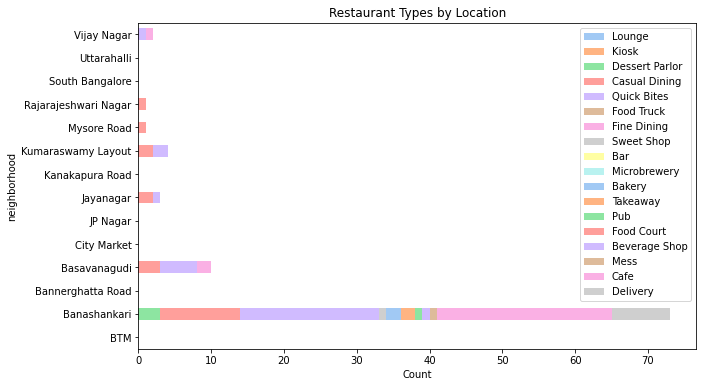

In [94]:
neighborhood.plot(kind='barh', stacked=True, figsize=(10,6))
plt.xlabel('Count')
plt.title('Restaurant Types by Location')
plt.show()

#### 9. dish_liked

In [95]:
df_new.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,...,menu_item,listed_in(type),listed_in(city),delivery_kitchen,latitude,longitude,zipcode,types,rest_type1,rest_type2
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",...,[],Buffet,Banashankari,no,12.965283,77.594452,560027,[Casual Dining],[Casual Dining],Casual Dining
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",...,[],Buffet,Banashankari,no,12.965283,77.594452,560027,[Casual Dining],[Casual Dining],Casual Dining
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",...,[],Buffet,Banashankari,no,12.965283,77.594452,560027,"[Cafe, Casual Dining]","[Cafe, Casual Dining]","Cafe, Casual Dining"
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",...,[],Buffet,Banashankari,no,12.965283,77.594452,560027,[Quick Bites],[Quick Bites],Quick Bites
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",...,[],Buffet,Banashankari,no,12.941726,77.575502,560004,[Casual Dining],[Casual Dining],Casual Dining


In [96]:
df_new.dish_liked.isnull().sum()

447

In [97]:
df_new.location

0           Banashankari
1           Banashankari
2           Banashankari
3           Banashankari
4           Basavanagudi
             ...        
994    Bannerghatta Road
995    Bannerghatta Road
996                  BTM
997             JP Nagar
998             JP Nagar
Name: location, Length: 899, dtype: object

In [98]:
df_new = df_new.dropna(subset = 'dish_liked', how ='any')

In [174]:
#df_new.dish_liked = df_new.dish_liked.str.strip()

In [166]:
#df_new = df.head(1000)

In [99]:
df_new = df_new.assign(dish_liked=df_new['dish_liked'].str.split(',')).explode('dish_liked')

In [100]:
df_new.dish_liked = df_new.dish_liked.str.strip()

In [101]:
grouped = df.groupby(['location', 'dish_liked']).size().reset_index(name='count')

In [102]:
grouped

,location,dish_liked,count
0,BTM,"Aloo Paratha, Ande Ka Funda",1
1,BTM,"Aloo Paratha, Poha, Samosa, Kachori, Chaat",1
2,BTM,"Aloo Paratha, Samosa, Kachori, Poha, Chaat",8
3,BTM,"Ambur Biryani, Mutton Biryani, Prawn, Raita, B...",3
4,BTM,"Appam, Chicken Biryani, Kizhi Biryani, Kuluki ...",6
...,...,...,...
5530,Yeshwantpur,"Idli, Masala Dosa",1
5531,Yeshwantpur,"Jeera Rice, Idli Vada",2
5532,Yeshwantpur,"Pork Pepper Fry, Mutton Chops, Mutton Biryani,...",2
5533,Yeshwantpur,"Salads, Chicken Soup, Fish, Curd Rice, Dal Tad...",2


In [103]:
dish_liked = set()
def func(x):
    if(type(x) == list):
        print(x)
        for y in x:
            types.add(y.strip())
_ = df_new['dish_liked'].str.split(',').apply(func)

['Pasta']
['Lunch Buffet']
['Masala Papad']
['Paneer Lajawab']
['Tomato Shorba']
['Dum Biryani']
['Sweet Corn Soup']
['Momos']
['Lunch Buffet']
['Chocolate Nirvana']
['Thai Green Curry']
['Paneer Tikka']
['Dum Biryani']
['Chicken Biryani']
['Churros']
['Cannelloni']
['Minestrone Soup']
['Hot Chocolate']
['Pink Sauce Pasta']
['Salsa']
['Veg Supreme Pizza']
['Masala Dosa']
['Panipuri']
['Gol Gappe']
['Onion Rings']
['Pasta']
['Kadhai Paneer']
['Salads']
['Salad']
['Roti']
['Jeera Rice']
['Farmhouse Pizza']
['Chocolate Banana']
['Virgin Mojito']
['Pasta']
['Paneer Tikka']
['Lime Soda']
['Prawn Pizza']
['Pizza']
['Mocktails']
['Coffee']
['Nachos']
['Salad']
['Pasta']
['Sandwiches']
['Waffles']
['Pasta']
['Coleslaw Sandwich']
['Choco Waffle']
['Tacos']
['Momos']
['Cheese Nachos']
['Waffles']
['Pasta']
['Crispy Chicken']
['Honey Chilli Chicken']
['Sandwich']
['Coffee']
['Crepe']
['Mocktails']
['Peri Fries']
['Lasagne']
['Pizza']
['Chicken Bbq Wings']
['Virgin Mojito']
['Nachos']
['Coffee']
[

In [104]:
counts = df_new.groupby(['dish_liked', 'location'], as_index=False).size().rename(columns={'size': 'count'})
counts

,dish_liked,location,count
0,Aam Panna,Banashankari,2
1,Afghani Biryani,Jayanagar,1
2,Almond Soup,Jayanagar,1
3,Aloo Paratha,BTM,2
4,Aloo Paratha,Kumaraswamy Layout,1
...,...,...,...
1030,Wine,Banashankari,3
1031,Wine,Jayanagar,1
1032,Wings,Bannerghatta Road,1
1033,Wonton Soup,Jayanagar,1


In [105]:
counts2 = df_new.groupby(['location','dish_liked'], as_index=False).size().rename(columns={'size': 'count'})
counts2

,location,dish_liked,count
0,BTM,Aloo Paratha,2
1,BTM,Biryani,1
2,BTM,Blueberry Waffles,1
3,BTM,Butter Chicken,1
4,BTM,Buttermilk,1
...,...,...,...
1030,Vijay Nagar,Murgh Platter,1
1031,Vijay Nagar,Neer Dosa,1
1032,Vijay Nagar,Paneer Tikka,1
1033,Vijay Nagar,Pepper Chicken,1


In [106]:
max_counts = counts2.groupby('location')['count'].idxmax()

# Finally, use the indices to filter the original dataset and print the results
for idx in max_counts:
    row = counts2.loc[idx]
    print(f"In {row['location']}, the most liked dish was {row['dish_liked']} with {row['count']} likes.")

In BTM, the most liked dish was Paratha with 4 likes.
In Banashankari, the most liked dish was Pasta with 39 likes.
In Bannerghatta Road, the most liked dish was Vegetable Biryani with 6 likes.
In Basavanagudi, the most liked dish was Sandwiches with 16 likes.
In JP Nagar, the most liked dish was Coffee with 6 likes.
In Jayanagar, the most liked dish was Pasta with 11 likes.
In Kumaraswamy Layout, the most liked dish was Biryani with 6 likes.
In Mysore Road, the most liked dish was Biryani with 2 likes.
In Rajarajeshwari Nagar, the most liked dish was Chilli Garlic Noodles with 1 likes.
In South Bangalore, the most liked dish was Pizza with 2 likes.
In Uttarahalli, the most liked dish was Biryani with 2 likes.
In Vijay Nagar, the most liked dish was Chilli Mushroom with 1 likes.


#### 10. cuisines

In [107]:
df_new.cuisines

0      North Indian, Mughlai, Chinese
0      North Indian, Mughlai, Chinese
0      North Indian, Mughlai, Chinese
0      North Indian, Mughlai, Chinese
0      North Indian, Mughlai, Chinese
                    ...              
997      Biryani, North Indian, Kebab
997      Biryani, North Indian, Kebab
997      Biryani, North Indian, Kebab
997      Biryani, North Indian, Kebab
997      Biryani, North Indian, Kebab
Name: cuisines, Length: 2337, dtype: object

In [108]:
#df_new = df.head(1000)

In [146]:
df_new = df_new.dropna(subset = 'cuisines', how = 'any')

In [117]:
cuisine = set()
def func(x):
    if(type(x) == list):
        print(x)
        for y in x:
            cuisine.add(y.strip())
_ = df_new['cuisines'].str.split(',').apply(func)

['North Indian', ' Mughlai', ' Chinese']
['Chinese', ' North Indian', ' Thai']
['Cafe', ' Mexican', ' Italian']
['South Indian', ' North Indian']
['North Indian', ' Rajasthani']
['North Indian']
['North Indian', ' South Indian', ' Andhra', ' Chinese']
['Pizza', ' Cafe', ' Italian']
['Cafe', ' Italian', ' Continental']
['Cafe', ' Mexican', ' Italian', ' Momos', ' Beverages']
['Cafe']
['Cafe', ' Italian', ' Continental']
['Cafe', ' Chinese', ' Continental', ' Italian']
['Cafe', ' Continental']
['Cafe', ' Mexican', ' Italian']
['Cafe']
['Cafe', ' Fast Food', ' Continental', ' Chinese', ' Momos']
['Chinese', ' Cafe', ' Italian']
['Cafe', ' Italian', ' American']
['Cafe', ' Chinese', ' Continental', ' Italian']
['Cafe', ' French', ' North Indian']
['Cafe', ' Pizza', ' Fast Food', ' Beverages']
['Cafe', ' Fast Food']
['Italian', ' Fast Food', ' Cafe', ' European']
['Cafe']
['Cafe', ' Bakery']
['Cafe', ' South Indian']
['Cafe', ' Fast Food', ' Beverages']
['Cafe', ' Fast Food']
['North Indian

In [118]:
column_names = list(cuisine)
# instantiate the dataframe
neighborhood = pd.DataFrame(columns=column_names)
neighborhood

,Ice Cream,Mughlai,Continental,Biryani,Street Food,North Indian,Thai,Chinese,Mediterranean,Mexican,...,Steak,Korean,Tea,Kerala,Momos,Rolls,Iranian,Healthy Food,Lebanese,Cafe


In [119]:
neighborhood['neighborhood'] = df_new.groupby('location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood

,Ice Cream,Mughlai,Continental,Biryani,Street Food,North Indian,Thai,Chinese,Mediterranean,Mexican,...,Steak,Korean,Tea,Kerala,Momos,Rolls,Iranian,Healthy Food,Lebanese,Cafe
neighborhood,,,,,,,,,,,,,,,,,,,,,
BTM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Banashankari,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basavanagudi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
City Market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JP Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jayanagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kanakapura Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kumaraswamy Layout,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
df_new.head(10)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),delivery_kitchen,latitude,longitude,zipcode
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,no,12.965283,77.594452,560027
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,no,12.941726,77.575502,560004
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,no,12.941726,77.575502,560004
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari,no,12.946662,77.530090,566026
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari,no,12.965283,77.594452,560027
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari,no,12.965283,77.594452,560027
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari,no,12.965283,77.594452,560027


In [121]:
df_new.loc[5, 'cuisines']

'North Indian'

In [159]:
df_new = pd.read_csv('/Users/ekanshtrivedi/Downloads/top_1000_zomato.csv')

In [122]:
i = 0
for i in range(0,len(df_new)):
    for x in cuisine:
        if type(df_new.loc[i, 'cuisines']) == str and x in df_new.loc[i, 'cuisines']:
            print(i)
            loc = df_new.loc[i, 'location']
            print("location:", loc)
            print("cuisine:", x)
            if loc in neighborhood.index:
                neighborhood.loc[loc, x] = neighborhood.loc[loc, x] + 1
            else:
                print("Unknown location:", loc)

0
location: Banashankari
cuisine: Mughlai
0
location: Banashankari
cuisine: North Indian
0
location: Banashankari
cuisine: Chinese
1
location: Banashankari
cuisine: North Indian
1
location: Banashankari
cuisine: Thai
1
location: Banashankari
cuisine: Chinese
2
location: Banashankari
cuisine: Mexican
2
location: Banashankari
cuisine: Italian
2
location: Banashankari
cuisine: Cafe
3
location: Banashankari
cuisine: North Indian
3
location: Banashankari
cuisine: South Indian
4
location: Basavanagudi
cuisine: North Indian
4
location: Basavanagudi
cuisine: Rajasthani
5
location: Basavanagudi
cuisine: North Indian
6
location: Mysore Road
cuisine: North Indian
6
location: Mysore Road
cuisine: Chinese
6
location: Mysore Road
cuisine: Andhra
6
location: Mysore Road
cuisine: South Indian
7
location: Banashankari
cuisine: Italian
7
location: Banashankari
cuisine: Pizza
7
location: Banashankari
cuisine: Cafe
8
location: Banashankari
cuisine: Continental
8
location: Banashankari
cuisine: Italian
8
l

113
location: Banashankari
cuisine: Mithai
114
location: Banashankari
cuisine: Bakery
115
location: Banashankari
cuisine: Street Food
115
location: Banashankari
cuisine: North Indian
116
location: Banashankari
cuisine: South Indian
117
location: Banashankari
cuisine: Ice Cream
117
location: Banashankari
cuisine: Desserts
117
location: Banashankari
cuisine: Juices
118
location: Banashankari
cuisine: North Indian
118
location: Banashankari
cuisine: Mangalorean
118
location: Banashankari
cuisine: South Indian
119
location: Banashankari
cuisine: North Indian
119
location: Banashankari
cuisine: Chinese
120
location: Banashankari
cuisine: Street Food
120
location: Banashankari
cuisine: North Indian
120
location: Banashankari
cuisine: Chinese
120
location: Banashankari
cuisine: South Indian
121
location: Banashankari
cuisine: North Indian
121
location: Banashankari
cuisine: Mangalorean
121
location: Banashankari
cuisine: South Indian
122
location: Banashankari
cuisine: Fast Food
122
location:

location: Jayanagar
cuisine: South Indian
225
location: JP Nagar
cuisine: South Indian
226
location: Jayanagar
cuisine: Beverages
226
location: Jayanagar
cuisine: Tea
227
location: Jayanagar
cuisine: Street Food
227
location: Jayanagar
cuisine: North Indian
228
location: Basavanagudi
cuisine: Italian
228
location: Basavanagudi
cuisine: Pizza
229
location: Kumaraswamy Layout
cuisine: Burger
229
location: Kumaraswamy Layout
cuisine: Beverages
229
location: Kumaraswamy Layout
cuisine: Cafe
230
location: Basavanagudi
cuisine: North Indian
230
location: Basavanagudi
cuisine: Chinese
230
location: Basavanagudi
cuisine: Fast Food
230
location: Basavanagudi
cuisine: Cafe
231
location: Basavanagudi
cuisine: Mangalorean
231
location: Basavanagudi
cuisine: South Indian
232
location: Basavanagudi
cuisine: Desserts
232
location: Basavanagudi
cuisine: Bakery
233
location: JP Nagar
cuisine: Ice Cream
234
location: Mysore Road
cuisine: South Indian
235
location: Basavanagudi
cuisine: North Indian
235


location: Banashankari
cuisine: Cafe
346
location: Basavanagudi
cuisine: Beverages
346
location: Basavanagudi
cuisine: Cafe
347
location: Basavanagudi
cuisine: Beverages
347
location: Basavanagudi
cuisine: Desserts
348
location: Banashankari
cuisine: North Indian
348
location: Banashankari
cuisine: Chinese
349
location: Banashankari
cuisine: Biryani
349
location: Banashankari
cuisine: Fast Food
350
location: Basavanagudi
cuisine: Fast Food
350
location: Basavanagudi
cuisine: Cafe
351
location: Banashankari
cuisine: North Indian
351
location: Banashankari
cuisine: Seafood
351
location: Banashankari
cuisine: Mangalorean
352
location: Banashankari
cuisine: Biryani
352
location: Banashankari
cuisine: North Indian
352
location: Banashankari
cuisine: Chinese
353
location: Kumaraswamy Layout
cuisine: North Indian
353
location: Kumaraswamy Layout
cuisine: Chinese
354
location: Mysore Road
cuisine: South Indian
355
location: South Bangalore
cuisine: Fast Food
355
location: South Bangalore
cuisi

KeyError: 438

In [123]:
df_new.cuisines.isnull().sum()

0

In [124]:
i=0
for i in range(0,len(df_new)):
    for x in cuisine:
        print(x)
        #if pd.notnull(df_new.loc[i, 'cuisines']) and type(df_new.loc[i, 'cuisines']) == str and x in df_new.loc[i, 'cuisines']:
        if type(df_new.loc[i, 'cuisines']) == str and x in df_new.loc[i, 'cuisines']:
            print(i)
            neighborhood.loc[df_new.loc[i, 'location'], x] = neighborhood.loc[df_new.loc[i, 'location'], x]+1

Ice Cream
Mughlai
0
Continental
Biryani
Street Food
North Indian
0
Thai
Chinese
0
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
1
Thai
1
Chinese
1
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean


Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
33
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
34
Street Food
North Indian
34
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
34
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American

Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
63
Thai
Chinese
63
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian

BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
95
Thai
Chinese
95
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
95
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
96
Bakery
96
Ma

Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
134
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
134
Vietnamese
Roast Chicken
Fast Food
134
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
A

Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
162
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
163
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
163
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian

North Indian
207
Thai
Chinese
207
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
207
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
208
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
208
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Foo

Street Food
North Indian
239
Thai
Chinese
239
Mediterranean
Mexican
Burger
Tibetan
Andhra
239
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
239
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
240
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian

Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
276
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
277
North Indian
Thai
Chinese
277
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
277
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
277
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
278
Continental
Birya

Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
311
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
311
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
311
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
312
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
312
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak

Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
346
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
347
Charcoal Chicken
Desserts
347
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
348
Thai
Chinese
348
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Boh

Biryani
Street Food
382
North Indian
Thai
Chinese
382
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
383
Juices
Vietnamese
Roast Chicken
Fast Food
383
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
383

415
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
Vietnamese
Roast Chicken
Fast Food
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
Street Food
North Indian
Thai
Chinese
416
Mediterranean
Mexican
Burger
Tibetan
Andhra
Hyderabadi
European
Middle Eastern
Beverages
Charcoal Chicken
Desserts
Goan
Salad
Japanese
Kebab
Bohri
Asian
Finger Food
Bihari
Seafood
Bengali
Mithai
Italian
French
Indonesian
Arabian
Sandwich
Juices
416
Vietnamese
Roast Chicken
Fast Food
416
Bakery
Maharashtrian
Oriya
Rajasthani
Pizza
Afghani
Mangalorean
Wraps
BBQ
South Indian
416
American
Steak
Korean
Tea
Kerala
Momos
Rolls
Iranian
Healthy Food
Lebanese
Cafe
Ice Cream
Mughlai
Continental
Biryani
417
Street Food
North Indian
417
Thai
Chinese
417
Mediterrane

KeyError: 438

In [125]:
neighborhood

,Ice Cream,Mughlai,Continental,Biryani,Street Food,North Indian,Thai,Chinese,Mediterranean,Mexican,...,Steak,Korean,Tea,Kerala,Momos,Rolls,Iranian,Healthy Food,Lebanese,Cafe
neighborhood,,,,,,,,,,,,,,,,,,,,,
BTM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Banashankari,20,6,32,58,26,142,8,108,0,12,...,2,2,0,0,18,12,2,4,2,70
Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Basavanagudi,8,0,4,8,20,36,0,32,0,0,...,0,0,0,0,4,6,0,6,0,16
City Market,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JP Nagar,2,0,0,0,0,2,2,0,0,0,...,0,0,0,0,0,0,0,2,0,0
Jayanagar,6,6,10,18,8,56,6,56,0,0,...,0,0,6,0,2,4,0,2,0,12
Kanakapura Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kumaraswamy Layout,4,2,2,14,8,48,0,50,0,0,...,0,0,0,0,6,12,0,0,0,6


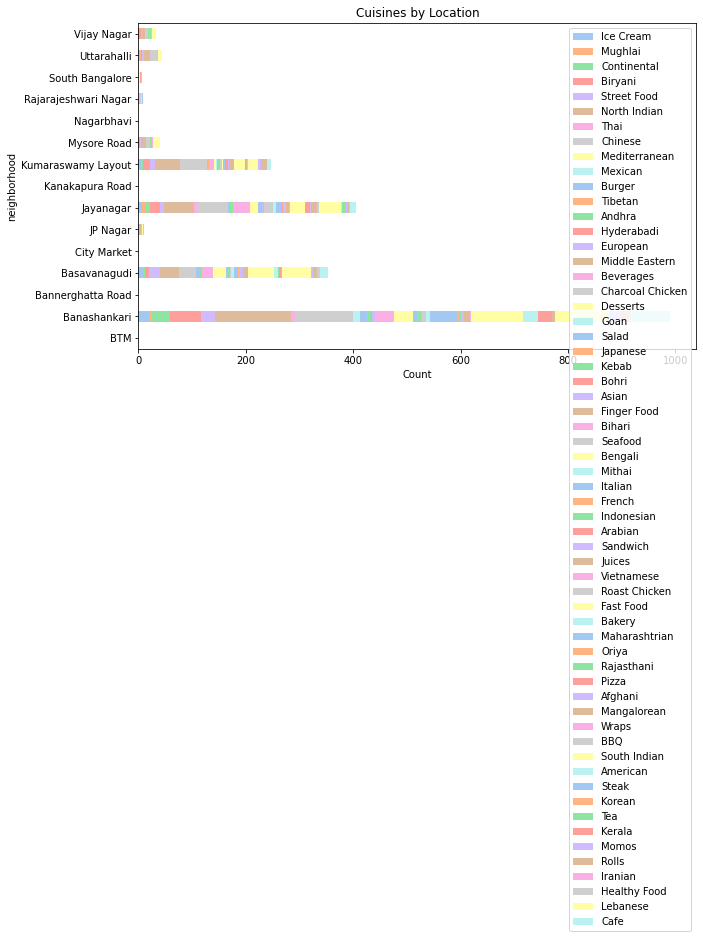

In [126]:
### need a better plot
neighborhood.plot(kind='barh', stacked=True, figsize=(10,6))
plt.xlabel('Count')
plt.title('Cuisines by Location')
plt.show()

#### 11. approx cost

In [161]:
df_new['approx_cost(for two people)'].isnull().sum()

0

In [162]:
df_new['approx_cost(for two people)'].head(10)

0    800
1    800
2    800
3    300
4    600
5    600
6    800
7    600
8    700
9    550
Name: approx_cost(for two people), dtype: object

In [163]:
df_new['approx_cost(for two people)'].value_counts()

300      149
400      118
200      112
500       85
150       83
250       69
600       63
800       57
100       52
700       39
450       34
350       31
750       19
550       18
650       17
1,000     14
900       11
1,200     10
850        5
950        3
1,300      3
1,500      2
1,100      2
199        1
80         1
160        1
1,600      1
Name: approx_cost(for two people), dtype: int64

In [164]:
df_new['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600'], dtype=object)

In [169]:
df_new['approx_cost(for two people)'] = df_new['approx_cost(for two people)'].str.replace(',', '')
df_new['approx_cost(for two people)'] = df_new['approx_cost(for two people)'].astype(float)

In [155]:
print(df_new.dtypes)

address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
delivery_kitchen                object
latitude                       float64
longitude                      float64
zipcode                         object
dtype: object


In [171]:
avg_cost = df_new.groupby(['latitude', 'longitude', 'location'])['approx_cost(for two people)'].mean().reset_index()

In [172]:
avg_cost.head()

,latitude,longitude,location,approx_cost(for two people)
0,12.850318,77.588326,Bannerghatta Road,550.000000
1,12.862468,77.560893,South Bangalore,366.666667
2,12.905568,77.545544,Uttarahalli,387.500000
3,12.907251,77.578271,JP Nagar,549.107143
4,12.908149,77.555318,Kumaraswamy Layout,373.636364


In [175]:
avg_cost['approx_cost(for two people)'].max()

800.0

In [178]:
rating_labels = ['Cheap','Moderate', 'Above Average', 'Excellent']
avg_cost['rating_cat'] = pd.cut(avg_cost['approx_cost(for two people)'], bins=[0, 250, 500, 650, 800], labels=rating_labels)

# create a map centered on the first location
m = folium.Map(location=[avg_ratings['latitude'].iloc[0], avg_ratings['longitude'].iloc[0]], zoom_start=10)

# add a marker for each location, with the size and color indicating the average rating category
for i, row in avg_cost.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color='#3186cc',
        fill_color=('#d53e4f' if row['rating_cat'] == 'Cheap'
                    else '#fc8d59' if row['rating_cat'] == 'Moderate'
                    else '#fee08b' if row['rating_cat'] == 'Above Average'
                    else '#e6f598' if row['rating_cat'] == 'Excellent'
                    else '#99d594'),
        fill_opacity=0.5,
        tooltip=f'{row["location"]}: {row["approx_cost(for two people)"]:.2f} ({row["rating_cat"]})'
    ).add_to(m)

# display the map
m

#### 12. reviews list

In [180]:
df_new.reviews_list

0      [('Rated 4.0', 'RATED\n  A beautiful place to ...
1      [('Rated 4.0', 'RATED\n  Had been here for din...
2      [('Rated 3.0', "RATED\n  Ambience is not that ...
3      [('Rated 4.0', "RATED\n  Great food and proper...
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...
                             ...                        
995    [('Rated 3.0', 'RATED\n  Ideal for quick neigh...
996    [('Rated 4.0', 'RATED\n  We ordered for Alankr...
997    [('Rated 4.0', 'RATED\n  This review should ha...
998    [('Rated 3.0', "RATED\n  We tried Chicken Shaw...
999    [('Rated 5.0', "RATED\n  Ordered Chicken Kadai...
Name: reviews_list, Length: 1000, dtype: object

In [182]:
df_new.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'delivery_kitchen', 'latitude',
       'longitude', 'zipcode'],
      dtype='object')

In [187]:
df_new['listed_in(type)'].value_counts()

Delivery              541
Dine-out              302
Cafes                  66
Desserts               59
Buffet                 24
Drinks & nightlife      8
Name: listed_in(type), dtype: int64

In [ ]:
# we get more information out of res_type and address than listed_in columns

In [188]:
del df_new['reviews_list']
del df_new['listed_in(type)']
del df_new['listed_in(city)']

In [ ]:
# we can get the information about the food items and the average ratings from the reviews, can prove to be a crucial feature if cleaned properly, but it might not have weightage in its information

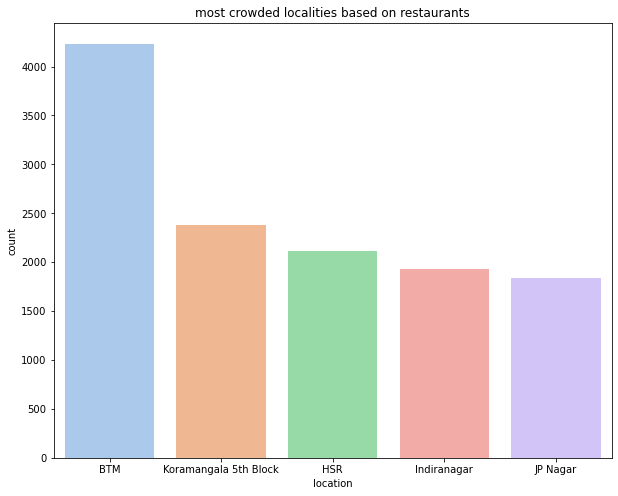

In [189]:
count_plot(df.location, "most crowded localities based on restaurants", 5)

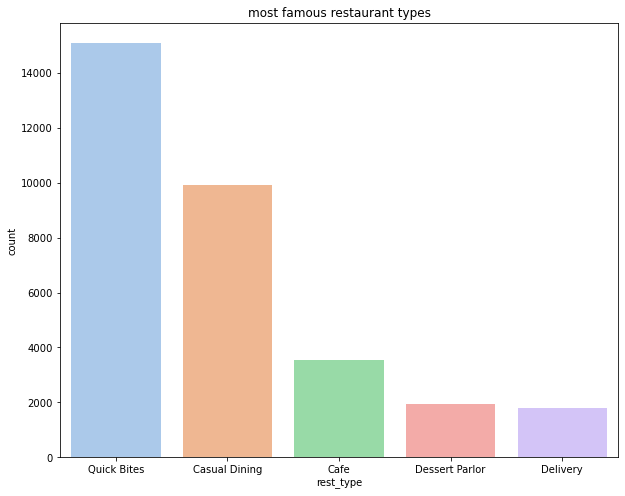

In [190]:
count_plot(df.rest_type, "most famous restaurant types",5)
